<a href="https://colab.research.google.com/github/aloy4646/students-grade-classification/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi menggunakan Decision Tree

In [3]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/tubesML/student-por-preprocessed.csv')
dataset.head(10)

,higher_yes,school_MS,studytime,Medu,Fedu,reason_reputation,address_U,internet_yes,Mjob_teacher,sex_M,Fjob_teacher,Mjob_health,romantic_yes,G3
0,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,11
1,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,11
2,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,12
3,0.344648,-0.730381,1.289120,1.309206,-0.278768,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,3.535752,1.308754,14
4,0.344648,-0.730381,0.083588,0.427801,0.630380,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,13
5,0.344648,-0.730381,0.083588,1.309206,0.630380,1.87963,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
6,0.344648,-0.730381,0.083588,-0.453605,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
7,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,13
8,0.344648,-0.730381,0.083588,0.427801,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,17
9,0.344648,-0.730381,0.083588,0.427801,1.539528,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13


## Membagi data train dan test

In [5]:
X = dataset.drop('G3', axis=1)
y = dataset['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Membuat model

    Max Depth: Menentukan kedalaman maksimum dari tree. Semakin dalam tree, semakin kompleks dan kemungkinan overfitting.
    
    Min Samples Split: Menentukan jumlah minimum sampel yang dibutuhkan untuk melakukan split pada sebuah node. Semakin besar nilainya, semakin generalisasi model, namun semakin kecil, semakin spesifik model.

    Min Samples Leaf: Menentukan jumlah minimum sampel yang harus ada pada setiap leaf node. Semakin kecil nilai ini, semakin kompleks model, dan semakin besar, semakin generalisasi.

    Max Features: Menentukan jumlah fitur yang dipilih secara acak untuk setiap split pada sebuah node. Semakin kecil nilai ini, semakin sedikit fitur yang digunakan, dan semakin besar, semakin kompleks model.

    Criterion: Menentukan kriteria untuk memilih fitur terbaik pada setiap split, antara Gini impurity atau entropy.

    Max Leaf Nodes: Menentukan jumlah maksimum leaf node pada tree. Semakin kecil nilai ini, semakin generalisasi model, dan semakin besar, semakin kompleks.

    Class Weight: Menentukan bobot untuk setiap kelas pada dataset. Berguna untuk menangani dataset yang tidak seimbang.

### Model 1

#### Training

In [6]:
model1 = DecisionTreeClassifier(max_depth=5,class_weight=None)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [7]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-1.sav'
pickle.dump(model1, open(filename, 'wb'))

#### Testing

In [10]:
def plot_confusion_matrix(cm, titles):
  class_names = ['0','7','8','9','10','11','12','13','14','15','16','17','18']
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  cbar = ax.figure.colorbar(im, ax=ax)

  ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=class_names,
        yticklabels=class_names,
        title=titles,
        ylabel='True label',
        xlabel='Predicted label')

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], 'd'),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")

  fig.tight_layout()
  plt.show()

##### Testing dengan test data

In [9]:
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Model 1')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 1
Accuracy: 0.38
Precision: 0.34
Recall: 0.41
F1 score: 0.34


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


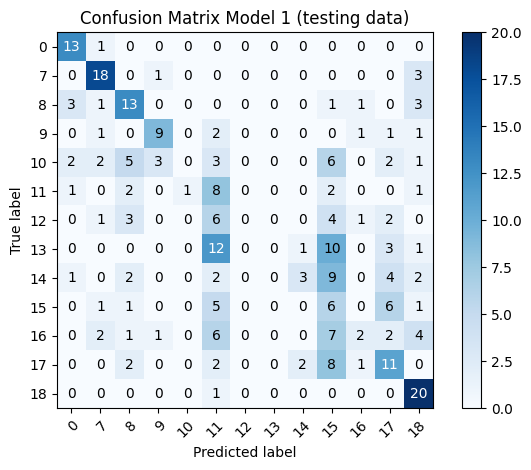

In [11]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), 'Confusion Matrix Model 1 (testing data)')

##### Testing dengan train data, untuk mengecek overfitting

In [12]:
y_pred = model1.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='macro')
recall = recall_score(y_train, y_pred, average='macro')
f1 = f1_score(y_train, y_pred, average='macro')

print('Model 1')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 1
Accuracy: 0.40
Precision: 0.43
Recall: 0.40
F1 score: 0.34


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


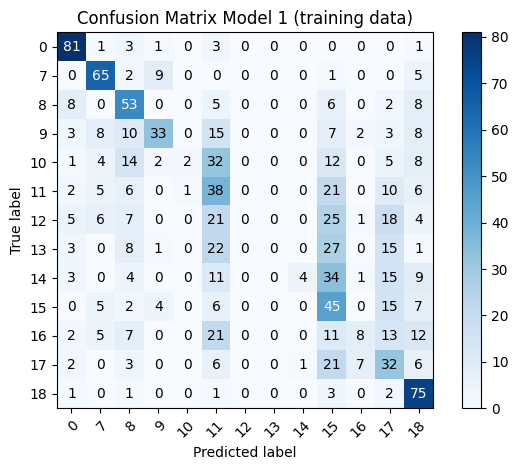

In [13]:
plot_confusion_matrix(confusion_matrix(y_train, y_pred), 'Confusion Matrix Model 1 (training data)')

### Model 2

#### Training

In [14]:
model2 = DecisionTreeClassifier(max_depth=3,class_weight=None)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-2.sav'
pickle.dump(model2, open(filename, 'wb'))

#### Testing

##### Testing dengan test data

In [16]:
y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='macro')
recall = recall_score(y_test, y_pred2, average='macro')
f1 = f1_score(y_test, y_pred2, average='macro')

print('Model 2')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 2
Accuracy: 0.24
Precision: 0.14
Recall: 0.27
F1 score: 0.18


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


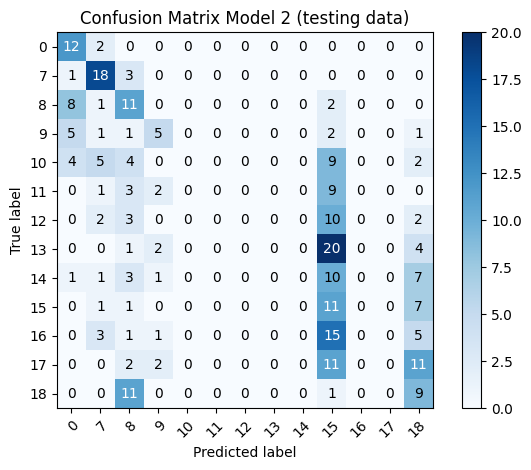

In [17]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred2), 'Confusion Matrix Model 2 (testing data)')

##### Testing dengan train data, untuk mengecek overfitting

In [18]:
y_pred2 = model2.predict(X_train)

accuracy = accuracy_score(y_train, y_pred2)
precision = precision_score(y_train, y_pred2, average='macro')
recall = recall_score(y_train, y_pred2, average='macro')
f1 = f1_score(y_train, y_pred2, average='macro')

print('Model 2')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 2
Accuracy: 0.28
Precision: 0.15
Recall: 0.28
F1 score: 0.19


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


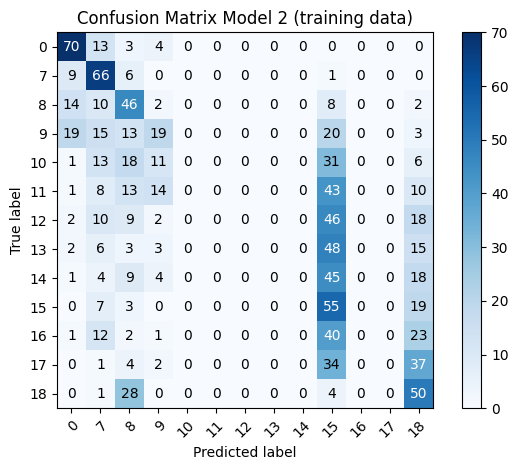

In [20]:
plot_confusion_matrix(confusion_matrix(y_train, y_pred2), 'Confusion Matrix Model 2 (training data)')

### Model 3

#### Training

In [21]:
model3 = DecisionTreeClassifier(max_depth=5,class_weight="balanced")
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [22]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-3.sav'
pickle.dump(model3, open(filename, 'wb'))

#### Testing

##### Testing dengan test data

In [23]:
y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, average='macro')
recall = recall_score(y_test, y_pred3, average='macro')
f1 = f1_score(y_test, y_pred3, average='macro')

print('Model 3')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 3
Accuracy: 0.38
Precision: 0.36
Recall: 0.38
F1 score: 0.34


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


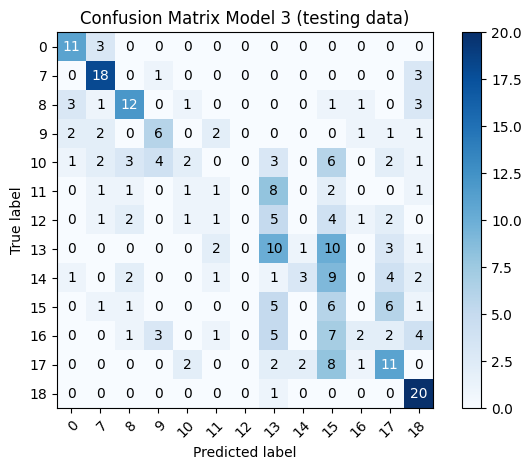

In [26]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred3), 'Confusion Matrix Model 3 (testing data)')

##### Testing dengan train data, untuk mengecek overfitting

In [27]:
y_pred3 = model3.predict(X_train)

accuracy = accuracy_score(y_train, y_pred3)
precision = precision_score(y_train, y_pred3, average='macro')
recall = recall_score(y_train, y_pred3, average='macro')
f1 = f1_score(y_train, y_pred3, average='macro')

print('Model 3')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 3
Accuracy: 0.41
Precision: 0.43
Recall: 0.40
F1 score: 0.36


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


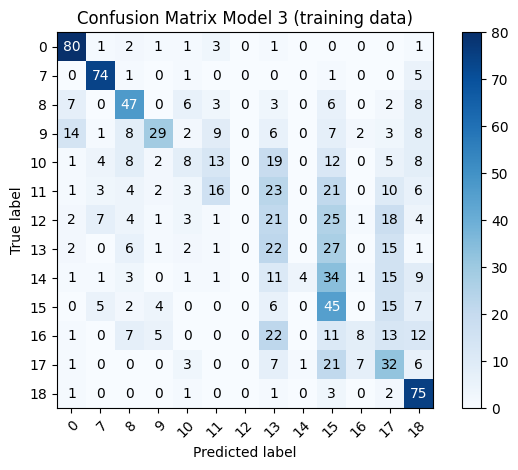

In [28]:
plot_confusion_matrix(confusion_matrix(y_train, y_pred3), 'Confusion Matrix Model 3 (training data)')

### Model 4

#### Training

In [29]:
model4 = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
model4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [30]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-4.sav'
pickle.dump(model4, open(filename, 'wb'))

#### Testing

##### Testing dengan test data

In [31]:
y_pred4 = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4, average='macro')
recall = recall_score(y_test, y_pred4, average='macro')
f1 = f1_score(y_test, y_pred4, average='macro')

print('Model 4')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 4
Accuracy: 0.24
Precision: 0.14
Recall: 0.27
F1 score: 0.18


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


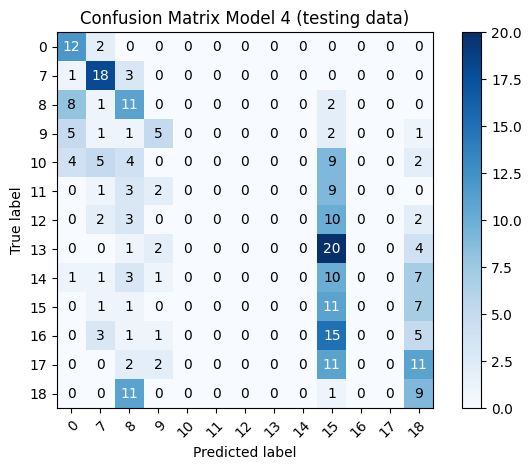

In [32]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred4), 'Confusion Matrix Model 4 (testing data)')

##### Testing dengan train data, untuk mengecek overfitting

In [33]:
y_pred4 = model3.predict(X_train)

accuracy = accuracy_score(y_train, y_pred4)
precision = precision_score(y_train, y_pred4, average='macro')
recall = recall_score(y_train, y_pred4, average='macro')
f1 = f1_score(y_train, y_pred4, average='macro')

print('Model 4')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 4
Accuracy: 0.41
Precision: 0.43
Recall: 0.40
F1 score: 0.36


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


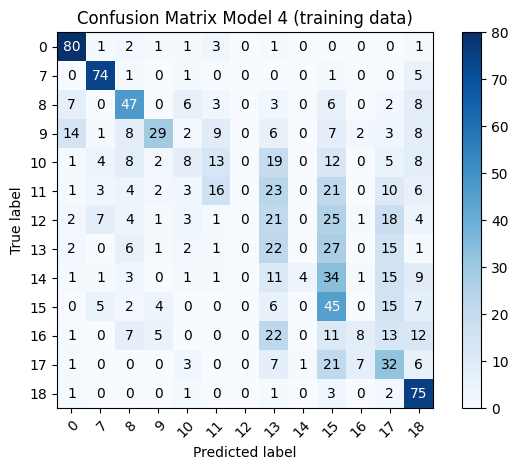

In [34]:
plot_confusion_matrix(confusion_matrix(y_train, y_pred4), 'Confusion Matrix Model 4 (training data)')